<a href="https://colab.research.google.com/github/rodelafue/Simulacion-UDEC/blob/master/Model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from sklearn import datasets, linear_model
from sklearn import preprocessing

# Comparando Sistemas por medio de Simulación

## Comparación de $k$ sistemas diferentes usando simulación

Sea $\mu_i = E[Y_{ij}]$ en valor esperado del $i^{avo}$ sistema

$$
\begin{align}
P_i &= \{Pr ~{Y_{ij} > \max\limits_{l\neq i} Y_{lj}}\}\\
\end{align}
$$
Es la probabilidad de que $Y_{ij}$ sea el mayor valor de los $j$ resultados a lo largo de todos los sistemas
$$
\begin{align}
    Y_{j} &= \begin{bmatrix}
           Y_{1j} \\
           Y_{2j} \\
           \vdots \\
           Y_{kj}
         \end{bmatrix}
\end{align}
$$

### Número aleatorios

* Si la independencia es crítica, es de utilidad saber el espacio existente entre semillas
* Las réplicas usan número aleatorios diferentes. 

### Problemas de comparación

* A menudo es de utilidad asignar la **misma semilla** a todos los escenarios (common random numbers, CRN)
* La intuición detras de CRN es que una compración más justa se logra cuando todos los sistemas son sometidos a las mismas condiciones de experimentación. 
$$
\begin{align}
    Var\left[\bar{Y_i}-\bar{Y_l}\right]= Var\left[\bar{Y_i}\right]+Var\left[\bar{Y_l}\right]-2 Cov\left[\bar{Y_i},\bar{Y_l}\right]
\end{align}
$$

Sin embargo, cuando se utilizan diferentes semillas se tiene que $Cov\left[\bar{Y_i},\bar{Y_l}\right]=0$, mientras que la **misma semilla** usualmente produce $Cov\left[\bar{Y_i},\bar{Y_l}\right]>0$, con lo que efectivamente se reduce la varianza de la diferencia. Este efecto puede ser mejorado por medio de la sincronización de los número aleatorios, lo que se logra forzando los número aleatorios para que cumplan el mismo propósito.

Se recomienda hacer un estudio exploratirio para asegurarse de que  los CRN tengan el efecto buscado. Esta covarianza debería ser positiva.

$$
\begin{align}
    Cov_{il}=\frac{1}{n-1}\sum\limits_{j=1}^{n}\left(Y_{ij}-\bar{Y_i}\right)\left(Y_{lj}-\bar{Y_l}\right)=\frac{1}{n-1}\sum\limits_{j=1}^{n}\left(Y_{ij}Y_{lj}-n\bar{Y_i}\bar{Y_l}\right)
\end{align}
$$

## Comparación de $k$ sistemas diferentes usando simulación

La comparación más sencialla es cuando se disponde de dos sistemas $k=2$
$$
\begin{align}
\bar{x} &=\frac{1}{n}\sum\limits_{j=1}^{n}x_j\\
S^2 &= \frac{1}{n-1}\sum\limits_{j=1}^{n}(x_j-\bar{x})^2 = \frac{1}{n-1}\sum\limits_{j=1}^{n}(x_j^2-n\bar{x}^2)
\end{align}
$$
Cuando los dos sistemas son simulados los resultados se tabulan como sigue, donde $D_j=Y_{1j}-Y_{2j}$
$$
\begin{array}{c|cccc|ccc}
 & \text{Replicas} &  &  & &\text{Media}&\text{Varianza}&\text{Resultado}\\
\hline
Sistema & 1 & 2 & \dots & n &\text{Muestral}&\text{Muestral}&\text{Esperado}\\
\hline
1 & Y_{11} & Y_{12} & \dots & Y_{1n} & \bar{Y_1} & S^2_1 & \mu_1\\
2 & Y_{21} & Y_{22} & \dots & Y_{2n} & \bar{Y_2} & S^2_2 & \mu_1\\
\hline
1-2 & D_1 & D_2 & \dots & D_n & \bar{D} & S^2_D & \mu_1-\mu_2
\end{array}
$$

Si los sistemas son independientes

$$
\begin{equation}
\bar{Y}_1-\bar{Y}_2 \pm t_{1-\frac{\alpha}{2},2n-2}\sqrt{\frac{S_1^2+S_2^2}{n}}
\end{equation}
$$
Por el contrario, si los sistemas son dependientes debido al uso de CRN
$$
\begin{equation}
\bar{Y}_1-\bar{Y}_2 \pm t_{1-\frac{\alpha}{2},n-1}\sqrt{\frac{S_D^2}{n}}
\end{equation}
$$

## Comparación de sistemas múltiples

Deje que $\mu_i$ represente el tiempo esperado de respuesta para el modelo $i$. Cree intervalos de confianza simultaneos para los parámetros $\mu_i-\mu_l$ para todo $i \neq l$, lo que generará $k(k-l)/2$ comparaciones. El procedimiento más utilizado cuando los resultados son independientes es la prueba de *Tukey*.

### Procedimiento

Se han obtenido $n$ resultados independientes $Y_{i1},Y_{i2},\dots,Y_{in_i}$ para el sistema $i$. Dejemos que $\bar{Y}_i=\sum_{j=1}^{n_i}Y_{ij}/n_i$ represente la media muestral del sistema $i$. Con esta información la **varianza agrupada** se puede obtener con la siguiente fórmula.

$$
\begin{align}
S^2 & =\frac{1}{k}\sum\limits_{i=1}^{k}\frac{1}{n_i-1}\sum\limits_{j=1}^{n_i}(Y_{ij}-\bar{Y}_i)^2\\
&=\frac{1}{k}\sum\limits_{i=1}^{k}\frac{1}{n_i-1}\left(\sum\limits_{j=1}^{n_i}Y_{ij}^2-n_i\bar{Y}_i^2\right)\\
\end{align}
$$

Luego, los intervalos de confianza simultaneos de **Tukey** se pueden calcular como sigue:

$$
\begin{equation}
\bar{Y}_i-\bar{Y}_l \pm \frac{Q_{k,r}^{(\alpha)}}{\sqrt{2}}S\sqrt{\frac{1}{n_i}+\frac{1}{n_l}}
\end{equation}
$$

para todos los $i \neq l$ donde $Q_{k,r}^{(\alpha)}$ es el $1-\alpha$ quantil de la [*studantized range*](https://www.real-statistics.com/statistics-tables/studentized-range-q-table/) distribución con parámetro $k$ y $r=\sum_{i=1}^{k}(n_i-1)$ grados de libertad


## Comparación de sistemas múltiples

Es un procedimiento de de busqueda que intenta seleccionar un subconjunto (random) de los $k$ sistemas en competencia.

### Criterios
 * Los escenarios en competencia son independientes
 * Los escenarios en competencia son balanceados ($n_1=n_2=\dots=n_k=n$)
 * los escenarios se distribuyen normal con varianza común $\sigma^2$ (desconocida)
 
### Procedimiento
 
* Especifique la probabilidad de incluir el mejor diseño en el subconjunto seleccionado $(1-\alpha)$
* Simule los sistemas independientemente para obtener IID resultados que se distribuyen normal, $Y_{i1},Y_{i2},\dots,Y_{in}$. Luego para $i=1,2,\dots,k$ obtenga la media muestral del sistema $i$: $\bar{Y}_i=\sum_{j=1}^{n}\frac{Y_{ij}}{n}$, y calcule la varianza agregada como un estimador insesgado de $\sigma^2$

$$
\begin{align}
S^2 & =\frac{1}{k}\sum\limits_{i=1}^{k}\frac{1}{n-1}\sum\limits_{j=1}^{n}(Y_{ij}-\bar{Y}_i)^2\\
&=\frac{1}{k}\sum\limits_{i=1}^{k}\frac{1}{n-1}\left(\sum\limits_{j=1}^{n}Y_{ij}^2-n\bar{Y}_i^2\right)\\
\end{align}
$$

* Incluya el $i^{avo}$ escenario en el subconjunto si $\bar{Y}_i \leq \min\limits_{1<j\leq k}\bar{Y}_j+gS\sqrt{\frac{2}{n}}$, donde $g = T^{(\alpha)}_{k-1,k(n-1)}$ es el valor crítico de una distribución $t$ multivariada.

Note que si un valor mayor es mejor, luego el $i^{avo}$ escenario se incluye en el subconjunto si $\bar{Y}_i \geq \max\limits_{1<j\leq k}\bar{Y}_j-gS\sqrt{\frac{2}{n}}$

## Comparación de sistemas múltiples con el mejor

Determine el mejor sistema por medio de intervalos de confianza simultaneos en los parámetros $\mu_i-\max_{l \neq i}\bar{Y}_{i.}$ es la media muestral de $l$ para $i=1,2,\dots,K$. Estos intervalos de confianza se conocen como comparación múltiple con el mejor. Las fórmula que se presentan a continuación usan la convención que un subíndice ''.'' indica que se ha tomado el promedio con respecto a ese subíndice. Por ejemplo, $\bar{Y}_{i.}$ es la media muestral de $Y_{i1},Y_{i2},\dots$

### Procedimiento Rinott + MCB (muestras independientes)

* Especifique los valores $\delta$ y $\alpha$ y el tamaño de la muestra de la primera etapa $n_0$.
* Tome una muestra IID $Y_{i1},Y_{i2},\dots,Y_{in_0}$ para cada uno de los $K$ subsistemas, simulados independientemente.
* Calcule la varianza muestral marginal para cada uno de los $K$ sistemas
$$
\begin{align}
S_i^2 & =\frac{1}{n_i-1}\sum\limits_{j=1}^{n_i}(Y_{ij}-\bar{Y}_i.)^2\\
&=\frac{1}{n_i-1}\left(\sum\limits_{j=1}^{n_i}Y_{ij}^2-n_i\bar{Y}_i.^2\right)\\
\end{align}
$$
* Encuentre $h$ de la tabla 8.3, con $\alpha = 0.1$ ó $0.05$ y calcule el tamaño de muestra final 
$$
\begin{align}
N_i & =\max\{n_0,\lceil{\left(\frac{hS_i}{\delta}\right)^2}\rceil\}\\
\end{align}
$$
* Tome $N_i-n_0$ muestras adicionales para el sistema $i, \forall ~i \in ~K$
* Calcule la media muestral
$$
\begin{align}
\bar{\bar{Y}}_{i.} & = \frac{1}{N_i}\sum\limits_{j=1}^{N_i} Y_{ij}, \text{para}~ i=1,2,\dots,K
\end{align}
$$

* Seleccione el sistema con el mayor $\bar{\bar{Y}}_{i.}$ como el mejor
* Simultaneamente forme los intervalos de confianza MCB para $\mu_i-\max\limits_{l\neq i}\mu_l$ como sigue

$$
\begin{align}
\min(0,\bar{\bar{Y}}_{i.}-\max\limits_{l\neq i}\bar{\bar{Y}}_{l.}-\delta), \max(0,\bar{\bar{Y}}_{i.}-\max\limits_{l\neq i}\bar{\bar{Y}}_{l.}+\delta), \text{para}~ i=1,2,\dots,K
\end{align}
$$

Si se requiere seleccionar un sistema con menor rendimiento como el mejor, cambie los dos pasos finales como sigue:
* Seleccione el sistema con el menor $\bar{\bar{Y}}_{i.}$ como el mejor
* Simultaneamente forme los intervalos de confianza MCB para $\mu_i-\max\limits_{l\neq i}\mu_l$ como sigue

$$
\begin{align}
\min(0,\bar{\bar{Y}}_{i.}-\min\limits_{l\neq i}\bar{\bar{Y}}_{l.}-\delta), \max(0,\bar{\bar{Y}}_{i.}-\min\limits_{l\neq i}\bar{\bar{Y}}_{l.}+\delta), \text{para}~ i=1,2,\dots,K
\end{align}
$$


### Procedimiento NM + MCB (números aleatorios comunes)

* Especifique los valores $\delta$ y $\alpha$ y el tamaño de la muestra de la primera etapa $n_0$.
* Tome una muestra IID $Y_{i1},Y_{i2},\dots,Y_{in_0}$ para cada uno de los $K$ subsistemas, usando CRN para los sistemas.
* Calcule la varianza muestral aproximada de la diferencia de las medias muestrales.

$$
\begin{align}
S^2 &= \frac{2\sum\limits_{i=1}^{K}\sum\limits_{j=1}^{n_0}(Y_{ij}-\bar{Y}_{i.}-\bar{Y}_{.j}+\bar{Y}_{..})^2}{(K-1)(n_0-1)}
\end{align}
$$

* Haga $g=T^(\alpha)_{K-1,(K-1)(n_0-1}$ y calcule el tamano de la muestra final

$$
\begin{align}
N & =\max\{n_0,\lceil{\left(\frac{gS}{\delta}\right)^2}\rceil\}\\
\end{align}
$$

* Tome $N-n_0$ muestras adicionales para el sistema $i, \forall ~i \in ~K$ usando CRN

$$
\begin{align}
\bar{\bar{Y}}_{i.} & = \frac{1}{N}\sum\limits_{j=1}^{N} Y_{ij}, \text{para}~ i=1,2,\dots,K
\end{align}
$$

* Seleccione el sistema con el mayor $\bar{\bar{Y}}_{i.}$ como el mejor
* Sumultaneamente forme los intervalos de confianza como en el caso de **Rinott + MCB**

### Procedimiento Bernulli + MCB (números aleatorios comunes)

* Especifique los valores $\delta$ y $\alpha$ y el tamaño de la muestra de la primera etapa $n_0$. Ademas haga $t=t_{1-\alpha/(K-1),n_0-1}$
* Tome una muestra IID $Y_{i1},Y_{i2},\dots,Y_{in_0}$ para cada uno de los $K$ subsistemas, usando CRN para los sistemas.
* Calcule la varianza muestral aproximada de la diferencia de las medias muestrales.

$$
\begin{align}
S_{il}^2 &= \frac{1}{n_0-1}\sum\limits_{j=1}^{n_0}[Y_{ij}-Y_{lj}-(\bar{Y}_{i.}-\bar{Y}_{l.})^2], \forall ~ i \neq l
\end{align}
$$

* Calcule el tamano de la muestra final

$$
\begin{align}
N & =\max\{n_0,\lceil{\max\limits_{l \neq i}\left(\frac{tS_{il}}{\gamma}\right)^2}\rceil\}\\
\end{align}
$$

* Tome $N-n_0$ muestras adicionales para el sistema $i, \forall ~i \in ~K$ usando CRN

$$
\begin{align}
\bar{\bar{Y}}_{i.} & = \frac{1}{N}\sum\limits_{j=1}^{N} Y_{ij}, \text{para}~ i=1,2,\dots,K
\end{align}
$$

* Seleccione el sistema con el mayor $\bar{\bar{Y}}_{i.}$ como el mejor
* Sumultaneamente forme los intervalos de confianza como en el caso de **Rinott + MCB**

## Comparación con un estandar
Seleccione la mejor estrategia ''solo si'' es mejor que un estandar. Si no hay una estrategia mejor que el estandar, continue con el estandar. Calcule la media del estandar $\mu_0$ y ordene las medias de los competidores $\mu_{[1]},\mu_{[2]},\dots,\mu_{[K]}$ para constantes $(\delta, \alpha_0, \alpha_1)$ con $0 < \delta < \infty$, $2^{-k}<1-\alpha_0<1$ y $(1-2^{-k})/K<1-\alpha_0<1$. Asi se tiene que:

$$
\begin{align}
P\{\text{seleccionar el estandar}\}\geq 1-\alpha_0, \text{cuando} ~~\mu_{[K]}\leq \mu_0\\
\end{align}
$$
y 

$$
\begin{align}
P\{\text{seleccionar la mejor estrategia}\}\geq 1-\alpha_1, \text{cuando} ~~\mu_{[K]}\geq \max\{\mu_0,\mu_{[K-1]}\}+\delta\\
\end{align}
$$

### Procedimiento BT
* Para un valor dado de $(k,\mu_0)$ y valores especificados $(\delta, \alpha_0, \alpha_1)$, obtenga un numero inicial de observaciones $n_0 \geq 2$, a ser tomadas en la etapa 1
* Elija constantes (g,h) desde la tabla 8.5 para $1-\alpha_0 = 0.9 ó 0.95$ correspondiente a $K, n_0, 1-\alpha_0 y 1-\alpha_1$ de interes. 
* En la parte 1, tome una muestra aleatoria de $n_0$ observaciones $Y_{ij}$ con $j=1,2,\dots,n_0$ para las $K$ estrategias. Calcule las medias muestrales de la primera etapa

$$
\begin{align}
\bar{Y}_i &= \frac{1}{n_0}\sum\limits_{j=1}^{n_0}Y_{ij} ~\text{para}~i=1,2,\dots,K\\
&\text{y la varianza conjunta insesgada}\\
S^2 & =\frac{1}{K}\sum\limits_{i=1}^{K}\frac{1}{n_0-1}\sum\limits_{j=1}^{n_0}(Y_{ij}-\bar{Y}_i)^2\\
&=\frac{1}{K}\sum\limits_{i=1}^{K}\frac{1}{n_0-1}\left(\sum\limits_{j=1}^{n_0}Y_{ij}^2-n_0\bar{Y}_i^2\right)\\
\end{align}
$$

* En el paso dos, tome una muestra aleatoria de tamaño $N-n_0$ de observaciones adicionales para cada una de las estrategias, donde
$$
\begin{align}
N & =\max\{n_0,\lceil{\left(\frac{gS}{\gamma}\right)^2}\rceil\}\\
\end{align}
$$
* Calcule la media muestral 
$$
\begin{align}
\bar{\bar{Y}}_{i} & = \frac{1}{N}\sum\limits_{j=1}^{N} Y_{ij}, \text{para}~ i=1,2,\dots,K
\end{align}
$$

* Si la mayor media muestral $\bar{\bar{Y}}_{[K]}>\mu_0+\frac{h\delta}{g}$, entonces seleccione la estratgia relacionada con dicha muestra $\mu_{[K]}$, de lo contrario seleccione el estandar.

* SI UNA MENOR media muestral $\bar{\bar{Y}}_{[K]}>\mu_0-\frac{h\delta}{g}$, entonces seleccione la estratgia relacionada con dicha muestra $\mu_{[K]}$, de lo contrario seleccione el estandar.

## Comparacion con un modelo por defecto

* Los datos del modelo por defecto pueden ser obtenidos ya sea del sistema en si mismo o de un modelo simulado. 
* En comparaciones con un modelo por defecto los modelos contendores deben competir tambien entre ellos mismos.

### El metodo de comparacion multiple
* Permita que $\mu_i$ denote el valor esperado del sistema $i$, donde $i=0$ corresponde al sistema por defecto, y $i=1,2,\dots,K-1$ corresponde a los $K-1$ sistemas en competencias (para un total de $K$ sistemas estocasticos). Cuando se compara con un sistema por defecto es mejor encontrar intervalos de confianza simultaneos para $\mu_i-\mu_0$ para $i=1,2,\dots,K-1$, mas bien que $\mu_i-\mu_l$ para cada $i \neq l$, lo que se conoce como *comparacion multiple con respecto a un control (MCC pro sus siglas en ingles)* Si las diferencias en una direccion especifica son de interes. Recolecte datos para el $i^{avo}$ sistema como $Y_{i1},Y_{i2},\dots,Y_{in_i}$ y calcule la varianza muestral como sigue:

$$
\begin{align}
S_i &=\frac{1}{n_i-1}\sum\limits_{j=1}^{n_i}(Y_{ij}-\bar{Y}_i)^2 \\
&= \frac{1}{n_i-1}(\sum\limits_{j=1}^{n_i}Y_{ij}^2-n_i\bar{Y}_i^2) \\
\end{align}
$$

* Luego el intervalo de confianza para varianzas desiguales esta dado por

$$
\begin{align}
\mu_i-\mu_0 \leq \bar{Y}_i-\bar{Y}_0 + \sqrt{\frac{t_{1-\beta,n_i-1}^2S_i^2}{n_i}+\frac{t_{1-\beta,n_0-1}^2S_0^2}{n_0}}\\
\end{align}
$$
* para cada $i \neq 0$ donde $t_{1-\beta,\nu}$ es el $1-\beta=(1-\alpha)^{1/(K-1)}$ quantil de la *distribucion t* con $\nu$ grados de libertad. Si el limite superior de $\mu_i-\mu_0$ es menor que o igual a cero, uno puede concluir que el sistema $i$ tiene un valor esperado menor.

## Estimando relaciones funcionales

Se quiere estimar la relacion funcional $Y=X\beta+\varepsilon$, donde $Y_{K\times1}, X_{K \times P}, \epsilon_{K \times 1}$. Luego, se realizan $n$ replicas a cada punto de diseño. Dejemos que $\bar{Y}_i=\sum\limits_{j=1}^{n}Y_{ij}/n$ sea la media muestral del punto $i$ y 
$$
\begin{align}
    \bar{Y} &= \begin{bmatrix}
           \bar{Y}_1 \\
           \bar{Y}_2 \\
           \vdots \\
           \bar{Y}_K 
         \end{bmatrix}
\end{align}
$$
representa el vector de medias muestrales a lo largo de los $K$ puntos de diseño, con lo cual podemos estimar los parámetros 
$$
\begin{align}
\hat{\beta}=(X^TX)^{-1}X^T\bar{Y}
\end{align}
$$

Asumiendo que $n \geq 25$ por punto, la matrix $\hat{\Sigma}_y$ de dimensiones $K \times K$ donde el $i^{avo}$ elemento esta dado por $S_i^2$ para $i=l$ y $C_{il}$ para $i \neq l$, where:

$$
\begin{align}
 S^2 &= \frac{1}{n-1}\sum\limits_{j=1}^{n}(Y_{ij}-\bar{Y}_i)^2 \\
 &= \frac{1}{n-1}\sum\limits_{j=1}^{n}(Y_{ij}^2-n\bar{Y}_i^2)
\end{align}
$$

Entonces $\hat{\Sigma}_y$ es un estimador de la matriz de varianza-covarianza de $Y$. Basado en $n$ replicas podemos obtener

$$
\begin{align}
 \hat{\Sigma}_{\hat{\beta}}=\frac{1}{n}(X^TX)^{-1}X^T\hat{\Sigma}_yX(X^TX)^{-1}
\end{align}
$$

Luego, podemos calcular el apropiado intervalo de confianza al $(1-\alpha)100\%$ para el $m^{avo}$ elemento de $\beta$ es:

$$
\begin{align}
 \hat{\beta}\pm t_{1-\frac{\alpha}{2},n-1}\hat{\sigma}_m
\end{align}
$$
donde $\hat{\sigma}_m$ es la raiz cuadrada del $m_{avo}$ elemento de la diagonal de $\hat{\Sigma}_{\hat{\beta}}$

In [ ]:
import pynolh as nolhd
import numpy as np

dim = int(4)
m, q, r = nolhd.params(dim)
conf = range(q)
remove = range(dim - int(r), dim)
nolh = nolhd.nolh(conf, remove)

/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/pynolh.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  M = numpy.zeros((q, s), dtype=int)
/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/pynolh.py:74: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return (numpy.concatenate((T, numpy.zeros((1, s)), -T), axis=0)[:, keep] + 8) / (2.0 * q)


In [ ]:
nolh

array([[ 0.5625,  0.6875,  0.9375,  0.8125],
       [ 0.625 ,  0.25  ,  0.    ,  0.875 ],
       [ 0.6875,  0.4375,  0.8125,  0.0625],
       [ 0.75  ,  0.625 ,  0.125 ,  0.    ],
       [ 0.8125,  0.9375,  0.3125,  0.4375],
       [ 0.875 ,  0.    ,  0.75  ,  0.375 ],
       [ 0.9375,  0.1875,  0.4375,  0.6875],
       [ 1.    ,  0.875 ,  0.625 ,  0.75  ],
       [ 0.5   ,  0.5   ,  0.5   ,  0.5   ],
       [ 0.4375,  0.3125,  0.0625,  0.1875],
       [ 0.375 ,  0.75  ,  1.    ,  0.125 ],
       [ 0.3125,  0.5625,  0.1875,  0.9375],
       [ 0.25  ,  0.375 ,  0.875 ,  1.    ],
       [ 0.1875,  0.0625,  0.6875,  0.5625],
       [ 0.125 ,  1.    ,  0.25  ,  0.625 ],
       [ 0.0625,  0.8125,  0.5625,  0.3125],
       [ 0.    ,  0.125 ,  0.375 ,  0.25  ]])

In [ ]:
range_max=np.array([800,500,900,10])
range_min=np.array([400,100,500,2])
ran = range_max-range_min
experimernt = np.multiply(ran,nolh)+range_min
expInt=experimernt.astype(int)
print(expInt)
np.savetxt("exper_clas_SIMIO.csv", expInt, delimiter=",",fmt='%.0f')
n=expInt.shape[0]

[[625 375 875   8]
 [650 200 500   9]
 [675 275 825   2]
 [700 350 550   2]
 [725 475 625   5]
 [750 100 800   5]
 [775 175 675   7]
 [800 450 750   8]
 [600 300 700   6]
 [575 225 525   3]
 [550 400 900   3]
 [525 325 575   9]
 [500 250 850  10]
 [475 125 775   6]
 [450 500 600   7]
 [425 425 725   4]
 [400 150 650   4]]


In [ ]:
filename = "/Users/rodrigodelafuente/Documents/Listo.csv"
p=pd.read_csv(filename,sep=",")
y=np.array(p)
range_1 = np.arange(1,n+1)
range_ = np.sort(range_1.tolist()*30)
idx = range(1,len(range_)+1)
exp_and_rep = ['exp '+str(i) for i in range_]
result = y[:,2]
data = np.rec.array([i for i in zip(idx,exp_and_rep,result)],dtype=[('idx', '<i4'),
                                ('Scenario', '|S8'),
                                ('result', '<i4')])
data

rec.array([(1, b'exp 1', 354), (2, b'exp 1', 355), (3, b'exp 1', 359),
 (4, b'exp 1', 349), (5, b'exp 1', 352), (6, b'exp 1', 340),
 (7, b'exp 1', 354), (8, b'exp 1', 351), (9, b'exp 1', 347),
 (10, b'exp 1', 353), (11, b'exp 1', 354), (12, b'exp 1', 358),
 (13, b'exp 1', 354), (14, b'exp 1', 357), (15, b'exp 1', 355),
 (16, b'exp 1', 358), (17, b'exp 1', 352), (18, b'exp 1', 352),
 (19, b'exp 1', 355), (20, b'exp 1', 360), (21, b'exp 1', 352),
 (22, b'exp 1', 350), (23, b'exp 1', 356), (24, b'exp 1', 355),
 (25, b'exp 1', 347), (26, b'exp 1', 359), (27, b'exp 1', 358),
 (28, b'exp 1', 347), (29, b'exp 1', 352), (30, b'exp 1', 354),
 (31, b'exp 2', 209), (32, b'exp 2', 213), (33, b'exp 2', 210),
 (34, b'exp 2', 214), (35, b'exp 2', 215), (36, b'exp 2', 212),
 (37, b'exp 2', 211), (38, b'exp 2', 213), (39, b'exp 2', 211),
 (40, b'exp 2', 211), (41, b'exp 2', 210), (42, b'exp 2', 211),
 (43, b'exp 2', 212), (44, b'exp 2', 210), (45, b'exp 2', 206),
 (46, b'exp 2', 212), (47, b'exp 2', 20

In [ ]:
res = pairwise_tukeyhsd(data['result'], data['Scenario'])
print(res)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
  group1    group2   meandiff   lower     upper   reject
--------------------------------------------------------
 b'exp 1' b'exp 10' -199.2667  -205.398 -193.1353  True 
 b'exp 1' b'exp 11'   2.3333    -3.798    8.4647  False 
 b'exp 1' b'exp 12'   -39.9    -46.0314  -33.7686  True 
 b'exp 1' b'exp 13'    15.9     9.7686   22.0314   True 
 b'exp 1' b'exp 14'  -89.8667  -95.998   -83.7353  True 
 b'exp 1' b'exp 15' -133.1667  -139.298 -127.0353  True 
 b'exp 1' b'exp 16'   -34.8    -40.9314  -28.6686  True 
 b'exp 1' b'exp 17'  -83.0667  -89.198   -76.9353  True 
 b'exp 1'  b'exp 2'   -142.4  -148.5314 -136.2686  True 
 b'exp 1'  b'exp 3'  46.4667   40.3353    52.598   True 
 b'exp 1'  b'exp 4' -167.1333 -173.2647  -161.002  True 
 b'exp 1'  b'exp 5'  -61.5333  -67.6647  -55.402   True 
 b'exp 1'  b'exp 6' -102.4667  -108.598  -96.3353  True 
 b'exp 1'  b'exp 7'  -89.9667  -96.098   -83.8353  True 
 b'exp 1'  b'exp 8'    24.2    

In [ ]:
mod = MultiComparison(data['result'], data['Scenario'])
print(mod.tukeyhsd())

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
  group1    group2   meandiff   lower     upper   reject
--------------------------------------------------------
 b'exp 1' b'exp 10' -199.2667  -205.398 -193.1353  True 
 b'exp 1' b'exp 11'   2.3333    -3.798    8.4647  False 
 b'exp 1' b'exp 12'   -39.9    -46.0314  -33.7686  True 
 b'exp 1' b'exp 13'    15.9     9.7686   22.0314   True 
 b'exp 1' b'exp 14'  -89.8667  -95.998   -83.7353  True 
 b'exp 1' b'exp 15' -133.1667  -139.298 -127.0353  True 
 b'exp 1' b'exp 16'   -34.8    -40.9314  -28.6686  True 
 b'exp 1' b'exp 17'  -83.0667  -89.198   -76.9353  True 
 b'exp 1'  b'exp 2'   -142.4  -148.5314 -136.2686  True 
 b'exp 1'  b'exp 3'  46.4667   40.3353    52.598   True 
 b'exp 1'  b'exp 4' -167.1333 -173.2647  -161.002  True 
 b'exp 1'  b'exp 5'  -61.5333  -67.6647  -55.402   True 
 b'exp 1'  b'exp 6' -102.4667  -108.598  -96.3353  True 
 b'exp 1'  b'exp 7'  -89.9667  -96.098   -83.8353  True 
 b'exp 1'  b'exp 8'    24.2    

In [ ]:
import matplotlib; print(matplotlib.__file__)
'''
plt.plot([0,1,2], res2[1][2], 'o')
plt.errorbar([0,1,2], res2[1][2], yerr=np.abs(res2[1][4].T-res2[1][2]), ls='o')
xlim = -0.5, 2.5
plt.hlines(0, *xlim)
plt.xlim(*xlim)
pair_labels = mod.groupsunique[np.column_stack(res2[1][0])]
plt.xticks([0,1,2], pair_labels)
plt.title('Multiple Comparison of Means - Tukey HSD, FWER=0.05' +
          '\n Pairwise Mean Differences')
'''

/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py


"\nplt.plot([0,1,2], res2[1][2], 'o')\nplt.errorbar([0,1,2], res2[1][2], yerr=np.abs(res2[1][4].T-res2[1][2]), ls='o')\nxlim = -0.5, 2.5\nplt.hlines(0, *xlim)\nplt.xlim(*xlim)\npair_labels = mod.groupsunique[np.column_stack(res2[1][0])]\nplt.xticks([0,1,2], pair_labels)\nplt.title('Multiple Comparison of Means - Tukey HSD, FWER=0.05' +\n          '\n Pairwise Mean Differences')\n"

In [ ]:
from scipy import stats
rtp = mod.allpairtest(stats.ttest_rel, method='Holm')
print(rtp[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.00, alphacBonf=0.000
  group1    group2     stat    pval  pval_corr reject
-----------------------------------------------------
 b'exp 1' b'exp 10'  240.3766  0.0      0.0     True 
 b'exp 1' b'exp 11'  -2.0651  0.048    0.1918  False 
 b'exp 1' b'exp 12'  38.7438   0.0      0.0     True 
 b'exp 1' b'exp 13'  -17.0714  0.0      0.0     True 
 b'exp 1' b'exp 14'   84.182   0.0      0.0     True 
 b'exp 1' b'exp 15'  51.5656   0.0      0.0     True 
 b'exp 1' b'exp 16'  11.9494   0.0      0.0     True 
 b'exp 1' b'exp 17'  39.9364   0.0      0.0     True 
 b'exp 1'  b'exp 2'  144.8171  0.0      0.0     True 
 b'exp 1'  b'exp 3'  -37.6174  0.0      0.0     True 
 b'exp 1'  b'exp 4'  199.686   0.0      0.0     True 
 b'exp 1'  b'exp 5'  46.0489   0.0      0.0     True 
 b'exp 1'  b'exp 6'   87.194   0.0      0.0     True 
 b'exp 1'  b'exp 7'  76.8293   0.0      0.0     True 
 b'exp 1'  b'exp 8'  -13.2852  0.0      0.0

In [ ]:
print(mod.allpairtest(stats.ttest_rel, method='b')[0])

Test Multiple Comparison ttest_rel 
FWER=0.05 method=b
alphacSidak=0.00, alphacBonf=0.000
  group1    group2     stat    pval  pval_corr reject
-----------------------------------------------------
 b'exp 1' b'exp 10'  240.3766  0.0      0.0     True 
 b'exp 1' b'exp 11'  -2.0651  0.048     1.0    False 
 b'exp 1' b'exp 12'  38.7438   0.0      0.0     True 
 b'exp 1' b'exp 13'  -17.0714  0.0      0.0     True 
 b'exp 1' b'exp 14'   84.182   0.0      0.0     True 
 b'exp 1' b'exp 15'  51.5656   0.0      0.0     True 
 b'exp 1' b'exp 16'  11.9494   0.0      0.0     True 
 b'exp 1' b'exp 17'  39.9364   0.0      0.0     True 
 b'exp 1'  b'exp 2'  144.8171  0.0      0.0     True 
 b'exp 1'  b'exp 3'  -37.6174  0.0      0.0     True 
 b'exp 1'  b'exp 4'  199.686   0.0      0.0     True 
 b'exp 1'  b'exp 5'  46.0489   0.0      0.0     True 
 b'exp 1'  b'exp 6'   87.194   0.0      0.0     True 
 b'exp 1'  b'exp 7'  76.8293   0.0      0.0     True 
 b'exp 1'  b'exp 8'  -13.2852  0.0      0.0   

In [ ]:
print(mod.allpairtest(stats.ttest_ind, method='b')[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=b
alphacSidak=0.00, alphacBonf=0.000
  group1    group2     stat    pval  pval_corr reject
-----------------------------------------------------
 b'exp 1' b'exp 10'  234.6757  0.0      0.0     True 
 b'exp 1' b'exp 11'  -2.1926  0.0324    1.0    False 
 b'exp 1' b'exp 12'  41.0609   0.0      0.0     True 
 b'exp 1' b'exp 13'  -16.3866  0.0      0.0     True 
 b'exp 1' b'exp 14'  86.3793   0.0      0.0     True 
 b'exp 1' b'exp 15'  53.7318   0.0      0.0     True 
 b'exp 1' b'exp 16'  11.0163   0.0      0.0     True 
 b'exp 1' b'exp 17'  42.1703   0.0      0.0     True 
 b'exp 1'  b'exp 2'  160.2475  0.0      0.0     True 
 b'exp 1'  b'exp 3'  -40.706   0.0      0.0     True 
 b'exp 1'  b'exp 4'  182.9005  0.0      0.0     True 
 b'exp 1'  b'exp 5'  43.8181   0.0      0.0     True 
 b'exp 1'  b'exp 6'  96.6205   0.0      0.0     True 
 b'exp 1'  b'exp 7'  86.1422   0.0      0.0     True 
 b'exp 1'  b'exp 8'  -14.3804  0.0      0.0   

In [ ]:
scaler = preprocessing.StandardScaler().fit(expInt)
X =scaler.transform(expInt) 

/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
y_resp1 = y[:,2].reshape((30,n))
y_resp_mean = y_resp1.mean(axis=0)
# Split the data into training/testing sets
y_train = y_resp1.mean(axis=0)
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)
# Train the model using the training sets
regr.fit(X, y_train)
# The coefficients
print('Coefficients: \n', regr.coef_)
y_resp2 = y[:,2].reshape((n,30))
cov = np.cov(y_resp2)
cov.shape

Coefficients: 
 [-2.83388069  0.55198348 -0.47015295  1.62512144]


/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(17, 17)

In [ ]:
out = np.linalg.inv(np.dot(X.T,X))
inner = np.dot(X.T,np.dot(cov,X))
sigmaB = np.dot(out,np.dot(inner,out))
sigmaB.shape

(4, 4)

In [ ]:
list(map(np.sqrt,np.diag(sigmaB)))

[2.3459043134445436,
 2.1422317149423957,
 0.95770569144161899,
 1.2504146713321314]

In [ ]:
from pyDOE import *

In [ ]:
design23 =fullfact([2, 3])
print(design23)

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]
 [ 0.  2.]
 [ 1.  2.]]


/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/pyDOE/doe_factorial.py:78: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rng = lvl*range_repeat


In [ ]:
design2n =ff2n(3)
print(design2n)

[[-1. -1. -1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]
 [ 1.  1. -1.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [-1.  1.  1.]
 [ 1.  1.  1.]]


/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/pyDOE/doe_factorial.py:78: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rng = lvl*range_repeat


In [ ]:
gen = 'a b ab'
fracfact3_1= fracfact(gen)
print(fracfact3_1)
print ('** Negative **')
gen = 'a b -ab'
fracfact3_1= fracfact(gen)
print(fracfact3_1)
gen = 'a b c abc'
fracfact4_1= fracfact(gen)
print ('** Resolution 2_IV^(4-1) **')
print(fracfact4_1)
gen = 'a b c ab ac'
fracfact4_1= fracfact(gen)
print ('** Resolution 2_III^(5-2) **')
print(fracfact4_1)

[[-1. -1.  1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]
 [ 1.  1.  1.]]
** Negative **
[[-1. -1. -1.]
 [ 1. -1.  1.]
 [-1.  1.  1.]
 [ 1.  1. -1.]]
** Resolution 2_IV^(4-1) **
[[-1. -1. -1. -1.]
 [ 1. -1. -1.  1.]
 [-1.  1. -1.  1.]
 [ 1.  1. -1. -1.]
 [-1. -1.  1.  1.]
 [ 1. -1.  1. -1.]
 [-1.  1.  1. -1.]
 [ 1.  1.  1.  1.]]
** Resolution 2_III^(5-2) **
[[-1. -1. -1.  1.  1.]
 [ 1. -1. -1. -1. -1.]
 [-1.  1. -1. -1.  1.]
 [ 1.  1. -1.  1. -1.]
 [-1. -1.  1.  1. -1.]
 [ 1. -1.  1. -1.  1.]
 [-1.  1.  1. -1. -1.]
 [ 1.  1.  1.  1.  1.]]


/Users/rodrigodelafuente/anaconda3/lib/python3.5/re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/pyDOE/doe_factorial.py:78: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rng = lvl*range_repeat


## Latin Hypercube Design

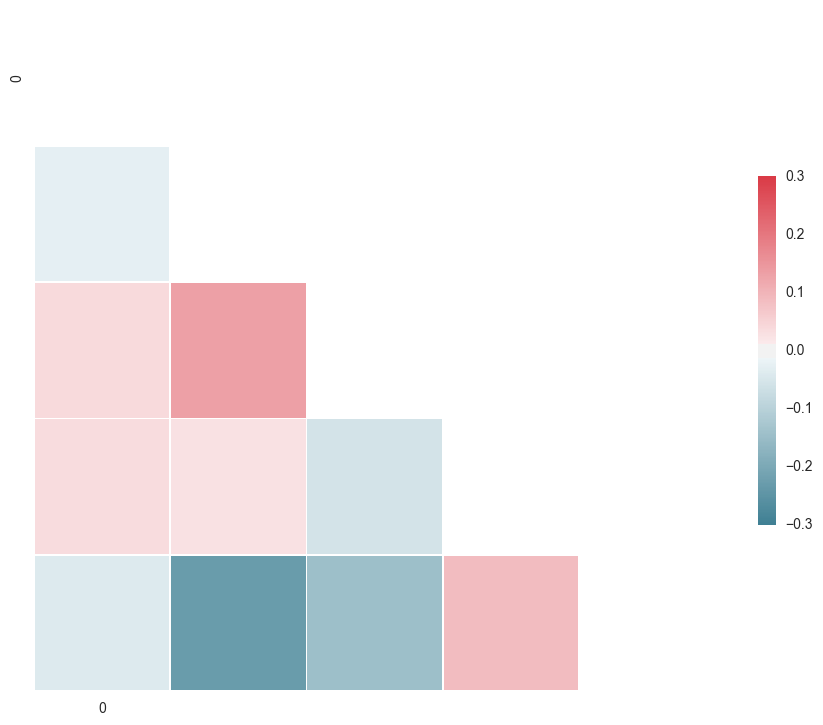

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="white")
a=lhs(5, samples=100, criterion='maximin',iterations=1000)
# Generate a large random dataset
d = pd.DataFrame(data=a)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

new candidate solution found with max,abs corrcoef = 0.9968717762428118


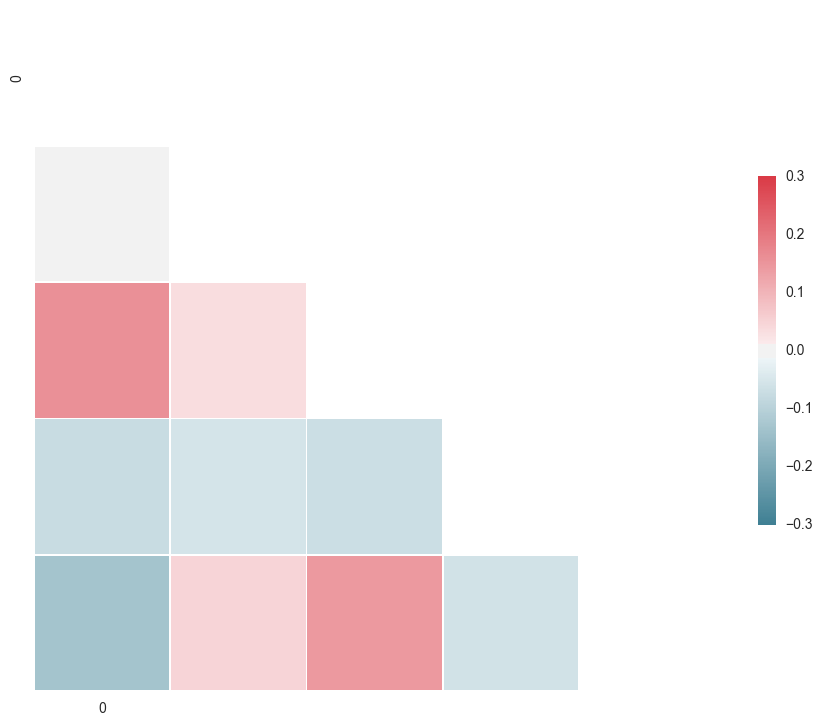

In [ ]:
a=lhs(5, samples=100, criterion='corr',iterations=1000)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
d = pd.DataFrame(data=a)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/pynolh.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  M = numpy.zeros((q, s), dtype=int)
/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/rodrigodelafuente/anaconda3/lib/python3.5/site-packages/pynolh.py:74: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return (numpy.concatenate((T, numpy.zeros((1, s)), -T), axis=0)[:, keep] + 8) / (2.0 * q)


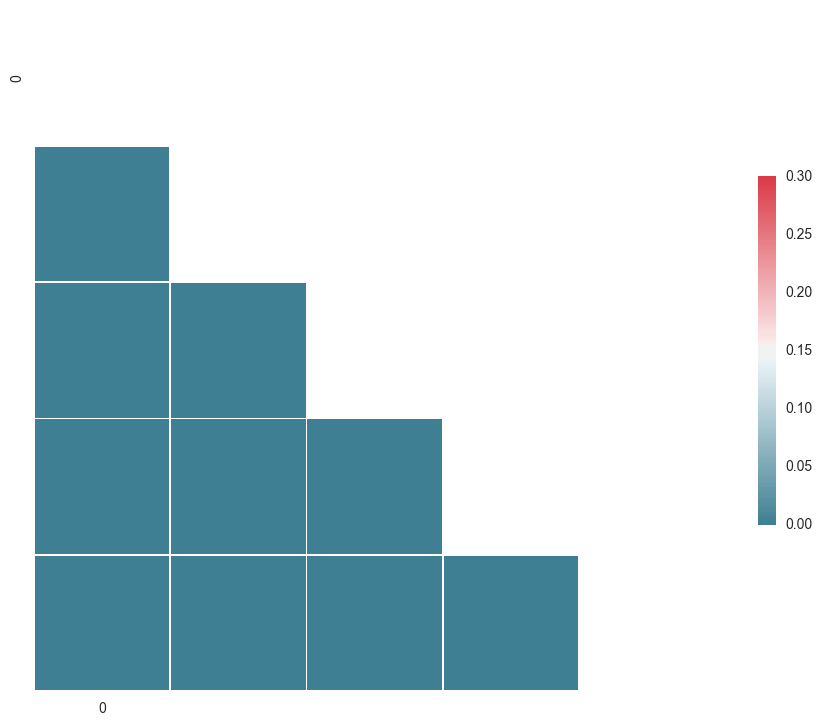

In [ ]:
dim = int(5)
m, q, r = nolhd.params(dim)
conf = range(q)
remove = range(dim - int(r), dim)
nolh = nolhd.nolh(conf, remove)
sns.set(style="white")

# Generate a large random dataset
d = pd.DataFrame(data=nolh)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)